In [ ]:
# import -> 머신러닝 분석을 위한 기본준비작업
import numpy as np #수치 계산을 위한 파이썬 라이브러리
import pandas as pd #데이터 분석을 위한 필수 라이브러리

import warnings #경고 메시지(Warnings)를 화면에 출력하지 않게함
warnings.filterwarnings('ignore')


---

## ✅ numpy (Numerical Python)

- 수치 계산을 위한 파이썬 라이브러리입니다.
- 배열, 행렬, 수학 함수 등을 **효율적으로 처리**할 수 있습니다.
- 머신러닝에서 **벡터 연산, 선형대수, 통계 연산** 등에 자주 사용됩니다.

---

## ✅ pandas

- 데이터 분석을 위한 **필수 라이브러리**입니다.
- **엑셀 같은 표 형태(=DataFrame)**로 데이터를 다룰 수 있게 해줍니다.
- 데이터를 **불러오고, 정제하고, 전처리하는 데 핵심 도구**입니다.
- 데이터 탐색(EDA), 결측값 처리, 그룹 분석 등에도 매우 유용합니다.

---


In [ ]:
# 데이터 로딩 : DataFrame
card_df=pd.read_csv('./creditcard.csv')
card_df.head(3) #상위 3개 행 확인

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0



---

## 📊 데이터 컬럼 설명

- **Time**  
  - 거래가 발생한 시간 (초 단위)  
  - 기준 시점으로부터의 경과 시간입니다.

- **V1 ~ V28**  
  - PCA(주성분 분석, Principal Component Analysis)로 변환된 **익명화된 거래 특성들**  
  - 민감한 개인 정보를 보호하기 위해 원래 특성을 변환한 값입니다.

- **Amount**  
  - 거래 금액을 나타냅니다.  
  - 금전적인 규모나 패턴 분석에 활용될 수 있습니다.

- **Class**  
  - 거래의 실제 라벨 (정답 값)  
  - `0`: 정상 거래  
  - `1`: 사기 거래 (fraud)

---


In [3]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# 전체 레이블 균형성 확인
# 정상거래와 사기거래의 비율 확인 (레이블 분포, 균형성 확인)
# 모델링 전에 데이터의 불균형 여부를 체크
card_df['Class'].value_counts()
# ['Class']: 그 중에서 Class라는 열(컬럼)만 선택
# Class 컬럼은 정답 라벨로서, 거래가 정상(0)인지 사기(1)인지를 나타냄

Class
0    284315
1       492
Name: count, dtype: int64


---

## ⚠️ 레이블 분포 결과

- `0`: 정상 거래가 **284,315건**
- `1`: 사기 거래가 **492건**

---

> ✅ → 극심한 불균형 (불균형 분류 문제)인 걸 알 수 있다.

---


---
### 전처리
---

In [5]:
# 인자로 입력받은 DataFrame을 복사하고 ,
# Time feature 삭제한 DataFrame 반환 함수
def get_preprocessed_df(df=None):
    df_copy=df.copy() # 원본 데이터프레임을 복사해서 대입, 원본이 보존된다
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

---
### 🧹 전처리 함수: get_preprocessed_df(df)
---
- **역할**: 원본 DataFrame을 복사하고, `Time` 컬럼을 제거한 복사본을 반환
- **이유**: 
  - `Time`은 모델 성능에 방해가 될 수 있는 특성 (노이즈)
  - 원본 데이터를 보호하기 위해 `.copy()` 사용

### 🔧 함수 구조

```python
def get_preprocessed_df(df=None):
    df_copy = df.copy()                     # 원본 복사
    df_copy.drop('Time', axis=1, inplace=True)  # 'Time' 컬럼 제거
    return df_copy                          # 전처리된 복사본 반환


In [ ]:
# 학습/테스트 데이터 분리하는 함수
from sklearn.model_selection import train_test_split #데이터 분리 함수 

def get_train_test_dataset(df=None): # df=card_df
    df_copy=get_preprocessed_df(df) # Time feature drop
    # get_preprocessed_df() 함수를 호출해서 Time 컬럼을 제거한 복사본을 생성
    # DataFrame에서 데이터와 레이블 분리
    
    # 데이터/ 레이블 분리리
    X_features=df_copy.iloc[:,:-1] # 데이터만 추출 #마지막 컬럼을 제외한 모든 컬럼(특성)
    y_target=df_copy.iloc[:,-1] # 레이블만 추출 #마지막 컬럼 (Class: 정답 라벨)
    
    # 학습/테스트 데이터 분리
    X_train, X_test, y_train, y_test =\
        train_test_split(
            X_features, y_target,
            test_size=0.3, #30%는 테스트, 70%는 학습
            random_state=0,#랜덤 시드 고정 (결과 재현성 보장)
            stratify=y_target #레이블 비율 유지 (불균형 분포 대응!)
        )
    return X_train, X_test, y_train, y_test
# 이 반환 값을 통해 학습/예측/성능평가가 가능


In [ ]:
# 상위 3개 
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


## 👁️ 데이터 미리보기: card_df.head(3)

### ✅ 코드
```python
card_df.head(3)


In [8]:
# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test= get_train_test_dataset(card_df)

In [ ]:
# 학습데이터 레이블 
print(y_train.value_counts()) #학습데이터 레이블 분포 출력
# ->0 (정상 거래)와 1 (사기 거래)의 개수를 세서 출력
print(y_train.shape[0]) # 학습 데이터 전체 샘플 수 출력 : 199364
print(y_train.value_counts()/y_train.shape[0]*100) #각테이블 비율 출력
# 각 클래스(0/1)가 전체 학습 데이터에서 몇 %를 차지하는지 계산
# => 심각한 불균형 데이터 : 이후 SMOTE, 언더샘플링, 앙상블, 평가지표 보정 등이 필요


Class
0    199020
1       344
Name: count, dtype: int64
199364
Class
0    99.827451
1     0.172549
Name: count, dtype: float64


In [10]:
# 학습/테스트 레이블 분포 비율 확인
print('학습 데이터 레이블의 분포 비율 ')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 분포 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블의 분포 비율 
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 분포 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [ ]:
# 1. 원본 데이터 가공 없이 모델 학습, 일반화 성능 확인
# 불균형 레이블 => 평가시 정확도만 보면 안된다. AUC 점수 확인
# 평가 결과를 출력 함수 -> 사이킷런에서 모델 성능 평가 지표 가져오기
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred) #오차행렬(예측과 실제 정답의 관계를 2x2 행렬로 보여줌)
    accuracy = accuracy_score(y_test , pred) #정확도 평가지표 계산
    precision = precision_score(y_test , pred) #정밀도 평가지표 계산
    recall = recall_score(y_test , pred) # 재현율 
    f1 = f1_score(y_test,pred) #정밀도와 재현율의 조화 평균
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba) #분류 성능 전체 평가
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


##  get_clf_eval() 함수 설명

### ✅ 역할
- 모델의 예측 결과를 입력받아 주요 **성능 지표**를 계산하고 출력하는 함수

### ✅ 입력 인자
- `y_test`: 실제 정답값
- `pred`: 모델의 예측값 (0 또는 1)
- `pred_proba`: 양성 클래스의 예측 확률 (AUC 계산용)

### ✅ 출력 지표
| 지표 | 설명 |
|------|------|
| 오차 행렬 | 예측 vs 실제 클래스 관계 |
| 정확도 (Accuracy) | 전체 예측 중 맞춘 비율 |
| 정밀도 (Precision) | 예측한 1 중에서 실제 1인 비율 |
| 재현율 (Recall) | 실제 1 중에서 맞춘 비율 |
| F1 점수 | Precision과 Recall의 조화 평균 |
| AUC | ROC 커브 아래 면적. **불균형 데이터에서 핵심 지표** |

### ✅ 사용 예시
```python
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)


### 1. 원본 데이터 가공 없이 모델 학습, 일반화 성능 확인

In [ ]:
# 이진 분류 : 신용카드 사기 검출 => 0 : 정상거래, 1 : 사기거래
from sklearn.linear_model import LogisticRegression #로지스틱 회귀 모델 생성
# -> 로지스틱 회귀 : 선형 모델로, 확률 기반의 이진 분류 알고리즘

# 1. object 생성 -> 모델 셍상
lr_clf=LogisticRegression(max_iter=1000) #반복 학습 횟수를 늘려서 수렴이 잘 되도록 설정
# -> 데이터가 많거나, 피처가 많을 때 꼭 필요

# 2. learning -> 모델 학습습
lr_clf.fit(X_train,y_train) #학습 데이터 (X_train, y_train)를 모델에 입력해서 가중치와 절편 학습

# 3. 예측수행 -> 모델 평가 : 예측값, 예측확률 구해야 한다
# 예측값 (0,1)
lr_pred=lr_clf.predict(X_test)
# 테스트 데이터에 대해 0 또는 1로 분류한 예측 결과
# 사용목적 : 혼동행렬, 정확도, 정밀도, 재현율, f1계산산

# 예측확률([0일 확률, 1일 확률])
lr_pred_proba=lr_clf.predict_proba(X_test)[:,1] # 사기인 1일 확률 추출
# 사용목적 : roc-auc 계산 (불균형 문제에 중요)

# 성능평가
get_clf_eval(y_test, lr_pred, lr_pred_proba)


오차 행렬
[[85282    13]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8750, 재현율: 0.6149,    F1: 0.7222, AUC:0.9714


In [ ]:
# 위 코드에서 모델만 바꾸고 나머지 코드 재사용 함수
def get_model_train_eval(model,          # 분류 알고리즘들들
                         ftr_train=None, # 학습데이터
                         ftr_test=None,  # 테스트 데이터
                         tgt_train=None, # 학습데이터 레이블 (y_train)
                         tgt_test=None): # 테스트데이터 레이블 (y_test)
    model.fit(ftr_train, tgt_train) # 모델 학습
    
    # 예측 수행
    pred=model.predict(ftr_test) # 예측값 구하기 (0,1)
    pred_proba=model.predict_proba(ftr_test)[:,1] # 예측 확률(사기일 확률 따로 추출)=> auc계산시 필수
    
    # 평가함수 호출
    get_clf_eval(tgt_test, pred, pred_proba) # 일반화 성능 평가

## ✅ get_model_train_eval 함수 설명

### 📌 목적
- 다양한 모델을 공통된 학습/예측/평가 절차로 실행
- 코드 재사용성과 실험의 일관성 확보

### 🔧 기능
- 모델 학습: `model.fit(X_train, y_train)`
- 예측 수행: `predict()` 및 `predict_proba()` 호출
- 성능 평가: `get_clf_eval()`로 정확도, 정밀도, 재현율, F1, AUC 출력

###  사용 예시
```python
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
get_model_train_eval(rf_clf, X_train, X_test, y_train, y_test)



---
### get_clf_eval() 함수에 넣어 성능을 종합 평가 -> 포함되는 평가 지표 
---
지표           	             설명
오차 행렬	        :  실제값 vs 예측값 비교

정확도 (Accuracy)	: 전체 중 얼마나 맞췄는가

정밀도 (Precision)	: 예측한 사기 중 진짜 사기 비율

재현율 (Recall)	    : 실제 사기 중 얼마나 잡았는가

F1 Score	       : Precision과 Recall의 조화 평균

AUC	               : 불균형 데이터에서 중요한 ROC 곡선 면적

In [ ]:
# 사이킷런 기반 lightgbm
from lightgbm import LGBMClassifier # 사이킷런 기반 VS 파이썬 기반
# fit(), predict(), predict_proba() 등 사이킷런 API를 동일하게 사용

# import lightgbm as lgbm            
lgbm_clf=LGBMClassifier(
    n_estimators=1000,#최대 1000개의 트리학습, 과적합 방지를 위해 조기 종료(Early Stopping)병행
    num_leaves=64,#트리의 최대 리프(leaf)개수. 클수록 복잡한 모델
    # device='gpu'
    n_jobs=-1,#CPU 코어를 모두 사용합니다. 학습 속도 향상 목적
    boost_from_average=False # 극도로 불균형한 레이블일 경우 False권장
) #-> 예측값이 극단적으로 쏠리는 걸 방지
# (LightGBM은 기본적으로 평균값을 기준으로 초기화하기 때문에, 클래스 불균형이 심하면 이 평균이 왜곡될 수 있음

---
## ✅ LightGBMClassifier 설명
---

### 📌 사용 목적
- 신용카드 사기 검출처럼 **클래스 불균형이 심한 이진 분류 문제**에서 강력한 성능 발휘
- 사이킷런처럼 사용 가능한 고성능 Gradient Boosting 모델

### 🔧 주요 파라미터
- `n_estimators=1000`: 최대 트리 수 (조기 종료와 함께 사용 추천)
- `num_leaves=64`: 트리 복잡도 조절 (과적합 방지용)
- `n_jobs=-1`: 멀티코어 CPU 활용 → 학습 속도 향상
- `boost_from_average=False`: 클래스 불균형 상황에서 성능 안정화

### 💡 장점
- 빠르고 정확한 트리 기반 앙상블
- 불균형 데이터에서 뛰어난 정밀도와 재현율
- GPU도 지원 (옵션 설정으로 가능)

### 📌 사용 예시
```python
lgbm_clf = LGBMClassifier(
    n_estimators=1000,
    num_leaves=64,
    n_jobs=-1,
    boost_from_average=False
)
lgbm_clf.fit(X_train, y_train)


In [ ]:
# 모델별 성능 비교
# lightGBM
get_model_train_eval(
    lgbm_clf, #모델
    ftr_train=X_train,#학습 데이터
    ftr_test=X_test,#테스트 데이터
    tgt_train=y_train, #학습 레이블
    tgt_test=y_test #테스트 레이블 (정답레이블)
)
# LogisticRegression
get_model_train_eval(
    lr_clf, #로지스틱 회귀 모델 객체
    ftr_train=X_train,
    ftr_test=X_test,
    tgt_train=y_train,
    tgt_test=y_test
)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

---
## ✅ 모델별 성능 비교 함수 호출
---

### 🔍 목적
- 다양한 분류 모델을 동일한 방식으로 학습하고 평가
- 정확도 외에도 정밀도, 재현율, F1, ROC-AUC를 확인하여 성능을 정량적으로 비교

---

### ⚙️ 사용한 함수: `get_model_train_eval()`

```python
def get_model_train_eval(model, ftr_train, ftr_test, tgt_train, tgt_test):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)


---
### XGBoost , RandomForest 모델 성능 비교 
---


In [11]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# XGBoost 모델
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# RandomForest 모델
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)


In [12]:
# Time 특성 제거 함수
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

# 학습/테스트 데이터 분리 함수
from sklearn.model_selection import train_test_split

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(
        X_features, y_target, test_size=0.3, random_state=0, stratify=y_target
    )
    return X_train, X_test, y_train, y_test


In [13]:
# 데이터 불러오기
import pandas as pd
card_df = pd.read_csv('./creditcard.csv')

# 학습/테스트 데이터 생성
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)


In [5]:
# 모델 성능 평가 함수
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬:')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(
        accuracy, precision, recall, f1, roc_auc))


In [8]:
# 모델 학습 + 평가 재사용 함수
def get_model_train_eval(model,          # 분류 알고리즘
                         ftr_train=None, # 학습 데이터
                         ftr_test=None,  # 테스트 데이터
                         tgt_train=None, # 학습 레이블
                         tgt_test=None): # 테스트 레이블
    model.fit(ftr_train, tgt_train)                         # 모델 학습
    pred = model.predict(ftr_test)                          # 예측값
    pred_proba = model.predict_proba(ftr_test)[:, 1]        # 예측 확률
    get_clf_eval(tgt_test, pred, pred_proba)                # 성능 평가


In [ ]:
# 모델 성능 비교 (XGBoOST, RandomForest)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# XGBoost
xgb_clf = XGBClassifier(
    n_estimators=1000,
    use_label_encoder=False,
    eval_metric='logloss', # 불균형 문제에 적합한 로그손실
    random_state=42
)

# RandomForest
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)


In [14]:
# XGBoost 성능 평가
print(' XGBoost 성능')
get_model_train_eval(
    xgb_clf,
    ftr_train=X_train,
    ftr_test=X_test,
    tgt_train=y_train,
    tgt_test=y_test
)

# RandomForest 성능 평가
print('\n RandomForest 성능')
get_model_train_eval(
    rf_clf,
    ftr_train=X_train,
    ftr_test=X_test,
    tgt_train=y_train,
    tgt_test=y_test
)


 XGBoost 성능


c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\xgboost\training.py:183: UserWarning: [18:05:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


오차 행렬:
[[85274    21]
 [   42   106]]
정확도: 0.9993, 정밀도: 0.8346, 재현율: 0.7162, F1: 0.7709, AUC: 0.9031

 RandomForest 성능
오차 행렬:
[[85291     4]
 [   42   106]]
정확도: 0.9995, 정밀도: 0.9636, 재현율: 0.7162, F1: 0.8217, AUC: 0.9373


### 2. 데이터 분포 확인, 변환후 모델 학습/예측/평가

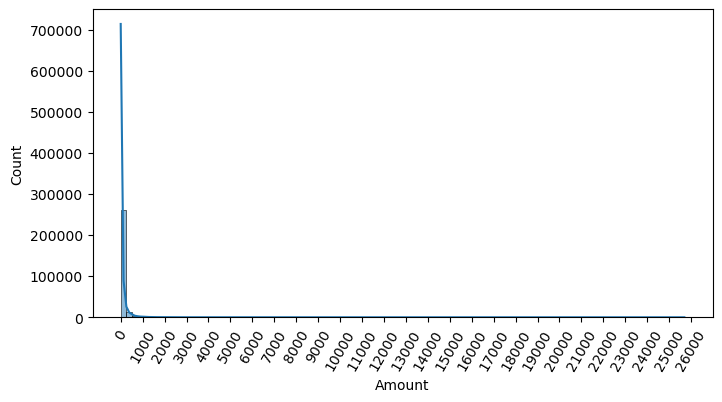

In [ ]:
# 특정 피처(금액)의 데이터 분포 확인
# 특정 피처의 데이터가 정규분포를 따르는지 확인
import matplotlib.pyplot as plt #데이터 시각화 라이브러리 
import seaborn as sns #seaborn : 데이터 시각화 라이브러리(통계적 시각화 간단하게 만들 수 있음)


plt.figure(figsize=(8,4)) #그래프 가로 8 인치, 세로 4인치
plt.xticks(range(0,30000, 1000), rotation=60) #X축 눈금을 0 ~ 30000까지 1000 단위로 표시
# 각 눈금을 60도 회전시켜서 눈금 라벨이 겹치지 않게 하기
sns.histplot(card_df['Amount'], bins=100, kde=True) #Amount 열의 값을 기준으로 히스토그램(histogram)그리기
# bins=100: 막대를 100개로 나눠서 더 세밀하게 분포 확인
# kde=True: 커널 밀도 추정(Kernel Density Estimation) 곡선을 함께 그림
# → 데이터의 분포 곡선을 부드럽게 표현
plt.show()



---

## ✅ 왜 이걸 하는가? (핵심 목적)
---

### ▶ 1. `Amount` 피처의 분포 파악
- 머신러닝에서는 수치형 피처가 **정규분포(종 모양)**를 따르지 않으면,  
  일부 알고리즘에서 성능이 떨어질 수 있다.
- `Amount`는 실제 거래 금액이기 때문에 분포가 **편향(skewed)**되어 있을 가능성이 높다.

### ▶ 2. 정규화 또는 로그 변환 필요성 판단
- 만약 `Amount`가 **심하게 치우친 분포(우측으로 긴 꼬리)**라면  
  → `log1p` 같은 **로그 변환**이 필요할 수 있다.
  → **모델 학습 전에 전처리 필요 여부를 판단**하는 과정

---

## ✅ 예시 시각화

```
▇▅▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
```

- 위처럼 **한쪽으로 치우친 분포**가 보인다면  
→ **로그 변환** 등을 통해 스케일링 해줘야 함.

---

## ✅ 요약

| 항목                  | 설명                                                                 |
|-----------------------|----------------------------------------------------------------------|
| `Amount` 분포 확인 이유 | 스케일링 / 로그 변환 전 **데이터 분포 형태를 이해**하기 위해          |
| 왜 `kde=True`?        | 데이터가 **정규분포를 따르는지** 시각적으로 확인하기 위해              |
| 향후 작업              | 필요 시 **로그 변환, 표준화** 등 전처리 수행 가능성 판단               |

---


In [ ]:
# 왜도값 확인 : 데이터의 비대칭성을 확인
# 비대칭일 때 처리 방식 : 로그변환

# 첨도값 확인 : 극단값 여부 확인
# 양의 첨도 : 꼬리가 두껍고 중앙 부분이 뾰족, 극단값이 자주 발생
# - 처리방식 : 극단값 처리 필수, 적절한 모델(알고리즘) 선택 필요
# 음의 첨도 : 꼬리가 얇고, 중앙 부분이 평평, 극단값이 적게 발생 
# 중간 첨도 : 정규분포를 따른다

# 어떤 데이터가 정규분포를 따른다 라는 의미 : 왜도가 0에 가깝고, 첨도도 0에 가까운 경우

from scipy.stats import skew, kurtosis

print('왜도 : ',skew(card_df['Amount']))
# skew(): Amount 컬럼의 왜도를 계산해서 얼마나 비대칭적인지 확인
print('첨도 : ',kurtosis(card_df['Amount']))
# kurtosis(): Amount 컬럼의 첨도를 계산해서 극단값이 많은지 확인

왜도 :  16.97763503663315
첨도 :  845.0777883188754



---

## ✅ 왜 이걸 하는가?

---

### ▶ 1. `왜도 (Skewness)` : 데이터의 **비대칭성** 확인

- **왜도 값이 0** → 데이터가 **대칭적인 분포**, 즉 **정규분포**를 따른다는 의미  
- **양의 왜도 (> 0)** → 오른쪽 꼬리가 길다 → **우측 치우침**  
- **음의 왜도 (< 0)** → 왼쪽 꼬리가 길다 → **좌측 치우침**

> 💡 **왜 중요한가?**  
> - 왜도가 크면 `로그 변환` 같은 **비선형 스케일링**으로 정규성에 가깝게 만들어야  
>   → **모델의 예측 성능이 개선**될 수 있음

---

### ▶ 2. `첨도 (Kurtosis)` : **극단값(outlier)의 빈도** 확인

- **첨도 값이 0** → 정규분포와 유사함  
- **양의 첨도 (> 0)** → 꼬리가 두껍고 뾰족 → **극단값 자주 발생**  
- **음의 첨도 (< 0)** → 꼬리가 얇고 평평 → **극단값 거의 없음**

> 💡 **왜 중요한가?**  
> - 극단값이 많으면 평균에 민감한 알고리즘(예: 회귀, 로지스틱 회귀)에서  
>   → **성능이 저하**될 수 있음  
> - **이상치 처리** 또는 **이상치에 강한 모델 선택** 필요

---

## ✅ 결과 해석 기준

| 값 범위     | 해석 내용                                 |
|-------------|--------------------------------------------|
| 왜도 ≈ 0    | 정규분포 → 변환 필요 없음                  |
| 왜도 > ±1   | 비대칭 → **로그 변환 등 필요 가능성**         |
| 첨도 ≈ 0    | 정규분포와 유사                            |
| 첨도 > 3    | 극단값 많음 → **이상치 처리 고려 필요**      |

---

## ✅ 정리

| 항목   | 의미                             | 사용 이유                          |
|--------|----------------------------------|-------------------------------------|
| 왜도   | 데이터가 좌/우로 치우쳤는지       | **로그 변환 필요성 판단**           |
| 첨도   | 극단값이 많은 분포인지 확인       | **이상치 제거 or 견고한 모델 필요**  |

---


In [16]:
# Amount 피처의 정규성 확인
from scipy.stats import shapiro 
# shapiro() 함수는 Shapiro-Wilk 검정을 통해
# ->주어진 데이터가 정규분포를 따르는지 통계적으로 확인
stat, p=shapiro(card_df['Amount'].values)

# p-value는 정규성을 가설로 두었을 때, 실제 데이터가 그 가설을 얼마나 따르는지 의미
# p-value > 0.05 : 귀무가설(정규분포를 따른다)을 기각하지 않음 → 정규성 있음
# (정규성 있음-> 일반적인 수치 모델(로지스틱 회귀 등)에서 전처리 없이 사용해도 괜찮음)

# p-value ≤ 0.05 : 귀무가설 기각 → 정규성 없음
# (정규성 없음 -> 로그 변환, 표준화 등 스케일링/정규화 전처리가 필요할 수 있음)
print(f'통계량 : {stat}')
print(f'p-value : {p}')
if p > 0.05:
    print('정규성을 만족')
else:
    print('정규성 없음')
# Amount가 정규성을 만족하지 않으면 → np.log1p(), StandardScaler, RobustScaler 등을 사용하여 정규성에 가깝게 변환

통계량 : 0.31004461476982703
p-value : 6.536480219597055e-199
정규성 없음


c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 284807.
  res = hypotest_fun_out(*samples, **kwds)


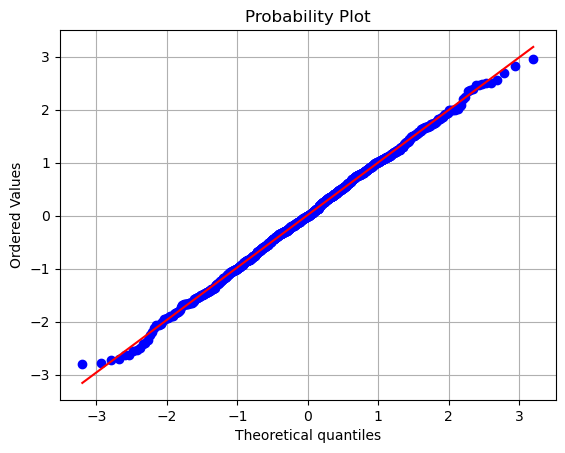

In [ ]:
# 정규성 있는 데이터 시각화
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 평균(loc) = 0, 표준편차(scale) = 1인 정규분포를 따르는 데이터 1,000개 생성
# -> 의도적으로 정규성을 갖도록 만든 데이터
data=np.random.normal(loc=0, scale=1, size=1000)

# QQ plot 생성 (정규성을 시각적으로 확인하는 방법)
stats.probplot(data, dist='norm', plot=plt)
# data가 주어진 분포(norm = 정규분포)를 얼마나 잘 따르는지를 시각적으로 비교
plt.grid() #그래프에 격자선을 추가하고 출력
plt.show()

---
## ✅ Q-Q Plot 해석
---

이 그래프는 **Probability Plot (Q-Q Plot)**으로,  
데이터가 **이론적인 정규분포와 얼마나 유사한지** 시각적으로 보여주는 도구.

---

### 🔍 그래프 구성

- **파란 점**: 실제 데이터의 분위수  
- **빨간 선**: 이상적인 정규분포 분위수 (기준선)  
- **기준**: 점들이 빨간 직선을 따를수록 → 정규성을 잘 따름

---

### ✅ 현재 그래프의 해석

| 항목 | 해석 |
|------|------|
| 전반적인 점의 분포 | 대부분의 점들이 빨간 직선 위에 잘 정렬되어 있음 |
| 양 끝 부분 | 약간의 벗어남이 있지만 극단값(outlier) 수준은 아님 |
| 중심부 | 거의 완벽하게 정렬됨 |

👉 **종합적으로 봤을 때**:  
✅ **정규분포를 잘 따르고 있음 (정규성 있음)**

---

### ✅ 결론

- 현재 데이터는 **정규성을 만족**
- 별도의 **로그 변환이나 정규화 등의 전처리는 필수는 아님**
- 이 데이터는 머신러닝 모델, 특히 **선형 모델이나 로지스틱 회귀**에도 적합할 가능성이 높다.




---

## ✅ Q-Q Plot 이란?
---

| 항목 | 설명 |
|------|------|
| **목적** | 데이터 분포가 정규분포와 얼마나 유사한지 시각적으로 판단 |
| **해석** | 데이터 점들이 45도 직선에 가깝게 놓이면 → 정규성을 만족 |
| **벗어남** | 직선에서 멀어지면 → 정규성이 약함 또는 극단값 존재 가능성 |

---

## ✅ 왜 이걸 하는가?

| 항목 | 이유 |
|------|------|
| **머신러닝 전처리** | 피처가 정규분포에 가까울수록 일부 모델(로지스틱, 선형회귀 등)의 성능이 더 좋아질 수 있음 |
| **정규성 판단** | 단순 통계(p-value)만으로는 부족할 수 있어 시각적으로 확인 |
| **로그 변환 여부 판단** | 데이터가 Q-Q Plot에서 직선을 많이 벗어나면 로그 변환 등의 전처리 필요성 ↑ |

---

## ✅ 정리

| 항목 | 내용 |
|------|------|
| **무엇을 하는가?** | 정규분포 데이터를 생성하고 Q-Q Plot으로 시각화 |
| **왜 하는가?** | 실제 데이터(`Amount`)의 분포와 비교해, 정규성 확인의 기준으로 활용하기 위해 |
| **해석** | Q-Q Plot이 직선을 잘 따를수록 → 정규성 만족 → 전처리 필요 낮음 |

---



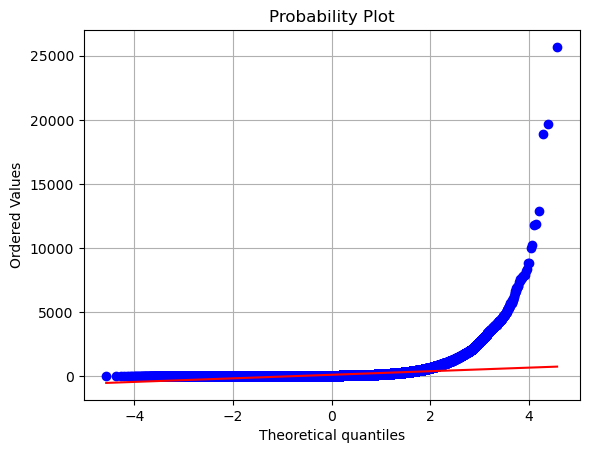

In [ ]:
# scipy.stats.probplot() 함수는 입력된 데이터와 지정된 분포(dist='norm')간의 확률분포 비교그래프를 만들기 위한 데이터생성
stats.probplot(card_df['Amount'].values, dist='norm', plot=plt) #card_df['Amount'].values → 실제 거래 금액 데이터
# dist='norm' → 기준 분포로 정규분포를 설정
# plot= plt → matplotlib을 사용해서 Q-Q plot을 시각화하겠다는 의미
plt.grid() #plt.grid()-> 그래프에 격자선(grid)추가해 시각적으로 해석하기 더 쉽도록 도와줌
plt.show()



---

## ✅ Q-Q Plot 해석

### 🔍 항목별 해석

| 항목 | 해석 |
|------|------|
| 전체적인 곡선 형태 | 오른쪽 위로 급격히 치솟는 곡선 형태 |
| 파란 점 (실제 분위수) | 오른쪽으로 갈수록 빨간 기준선에서 크게 벗어남 |
| 빨간 선 (이론 정규분포) | 거의 수평에 가깝지만 데이터는 급격히 증가 |

---

### 🔍 정규성 판단

- **오른쪽 꼬리가 매우 길고 극단값이 많음** → **강한 양의 왜도**
- 빨간 기준선과 파란 점 간의 괴리가 큼 → **정규성을 만족하지 않음**
- 특히 **고액 거래(Amount)**의 극단값들이 정규성을 크게 깨뜨림

---

## ✅ 결론

| 항목 | 해석 |
|------|------|
| 정규성 여부 | ❌ 정규성 없음 |
| 전처리 필요성 | ✅ 로그 변환 (`np.log1p`), 정규화 필요 |
| 이유 | 데이터가 **한쪽으로 치우친 분포(우측 치우침)**를 가지며, **극단값(Outlier)**이 많기 때문 |

---






---

# ✅ 왜 이걸 하는가? (Q-Q Plot 분석)

### ▶ `Amount` 피처가 정규분포를 따르는지 확인하려고

정규성을 따르는지 판단하는 이유:

---

## ✅ 목적 및 중요성

| 이유 | 설명 |
|------|------|
| **정규분포 여부 확인** | 일부 머신러닝 모델 (예: `Logistic Regression`, `선형 회귀`)은 **정규성 가정** 하에서 더 좋은 성능을 냄냄. |
| **로그 변환 필요성 판단** | Q-Q Plot에서 점들이 **직선에서 크게 벗어나** 있다면 → `Amount`는 정규성을 따르지 않음 → **로그 변환** 등 전처리 필요 |
| **극단값(outlier) 여부 확인** | Q-Q Plot의 양 끝에서 점들이 많이 벗어나 있다면 → **극단값 존재 가능성**이 높음 |

---

## ✅ 해석 방법 (Q-Q Plot)

- **Q-Q Plot**은 데이터의 분위수와 정규분포의 분위수를 비교하여 정규성을 시각적으로 보여줌.

| 상황 | 해석 | 처리 방향 |
|------|------|------------|
| 점들이 45도 직선에 가까이 분포 | `Amount`는 **정규분포를 따름** | 전처리 불필요 |
| 점들이 곡선을 그리거나 직선에서 크게 벗어남 | `Amount`는 **비정규 분포** | `log1p`, 정규화, 표준화 필요 가능성 ↑ |
| 양 끝에서 크게 벗어남 | **극단값 존재 가능성** ↑ | 이상치 제거, Robust 모델 고려 |

---

## ✅ 정리

| 항목 | 설명 |
|------|------|
| **무엇을 하는가?** | `Amount` 피처가 **정규성을 따르는지 시각적으로 분석** |
| **왜 중요한가?** | 정규성 여부에 따라 **모델 성능 및 전처리 전략**이 달라지기 때문 |
| **해석 포인트** | 점들이 **45도 대각선**에 잘 정렬되면 → **정규성 만족**<br>벗어나면 → **정규성 없음 → 전처리 필요** |

---



In [ ]:
# standardzation : 데이터 정규분포 형태로 변환
from sklearn.preprocessing import StandardScaler

# 1. 기존 Amount feature 확인: 평균, 표준편차, 왜도, 첨도
avg_amount=card_df['Amount'].mean() #평균:전반적인 크기, 분산
std_amount=card_df['Amount'].std() #표준편차: 전반적 크기, 분산산
skew_amount=skew(card_df['Amount']) #왜도: 비대칭성 확인
kurtosis_amount=kurtosis(card_df['Amount']) #첨도: 극단값 정도 확인

#  2. StandardScaler()로 표준화 진행 (SS)
scaler=StandardScaler() #standardscaler 로 표준화 진행
# StandardScaler는 데이터를 평균 0, 표준편차 1로 변환
# -> 정규분포에 가깝게 만들기 위한 전처리
ss_amount=scaler.fit_transform(card_df['Amount'].values.reshape(-1,1))

# 3. 표준화 전후 결과 비교 출력
print('기존 데이터의 평균, 표준편차, 왜도, 첨도')
print(f'{avg_amount} / {std_amount} / {skew_amount} / {kurtosis_amount}')

print('표준화한 데이터의 평균, 표준편차, 왜도, 첨도')
print(f'{ss_amount.mean()} / {ss_amount.std()} / {skew(ss_amount)} / {kurtosis(ss_amount)}')
# 표준화 후 → 평균이 0에 가깝고, 표준편차가 1이 됨
# 왜도, 첨도도 줄어들 수 있음 → 정규성 향상

기존 데이터의 평균, 표준편차, 왜도, 첨도
88.34961925093133 / 250.1201092402221 / 16.97763503663315 / 845.0777883188754
표준화한 데이터의 평균, 표준편차, 왜도, 첨도
2.913951958230651e-17 / 1.0 / [16.97763504] / [845.07778832]




---

## ✅ 왜 사용하는가?

| 이유 | 설명 |
|------|------|
| 🎯 **스케일 차이 제거** | `Amount`는 다른 피처들에 비해 값의 범위가 매우 큽니다 (예: 0 ~ 수만 원대)<br>→ 머신러닝 모델이 이 피처에 과도하게 영향받을 수 있음 |
| 🎯 **정규성 유도** | 일부 모델 (예: **로지스틱 회귀**, **SVM**)은 입력 변수가 정규분포에 가까울수록 성능이 좋아짐 |
| 🎯 **학습 안정성 향상** | 평균 0, 표준편차 1로 정규화하면 **학습 속도가 빨라지고**, **수렴이 쉬워짐** |
| 🎯 **왜도(skewness), 첨도(kurtosis) 개선** | 극단값에 민감한 데이터를 **좀 더 대칭적이고 안정적인 형태로 변환** |

---


오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790
오차 행렬
[[85280    15]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8611, 재현율: 0.6284,    F1: 0.7266, AUC:0.9735

### 로지스틱 회귀 예측 성능
오차 행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8692, 재현율: 0.6284,    F1: 0.7294, AUC:0.9706
### Light GBM 예측 성능
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,    F1: 0.8409, AUC:0.9779

### 로지스틱 회귀 예측 성능
오차 행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014,    F1: 0.7120, AUC:0.9734
### Light GBM 예측 성능
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9796

In [ ]:
# 데이터를 SS 처리후 성능 평가
def get_preprocessed_df(df=None): # 원본 데이터프레임(df) 를 받아서 전처리된 데이터프레임 반환
    df_copy=df.copy() #원본 데이터를 직접 수정하지 않고, 복사본을 만들어서 전처리 작업
# -> 원본 보존 + 재사용 가능성을 위해 꼭 필요한 단계
    
    # SS 성능 변화 없어서, 표준화(평균 0, 표준편차 1) 방식은 성능 향상에 큰 도움이 되지 않았기 때문에 제외
    # scaler=StandardScaler()
    # ss_amount=scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    amount_n=np.log1p(df_copy['Amount']) #Amount 컬럼에 로그 변환(log1p)적용
    # np.log1p(x)는 log(1 + x)의미
    
    # 앞에서 만든 amount_n을 새로운 컬럼(Amount_Scaled) 으로 넣음음
    df_copy.insert(0, 'Amount_Scaled', amount_n) #insert(0, ...)는 이 컬럼을 가장 앞 열에 추가
    
    # 불필요하거나 의미가 낮은 컬럼들을 제거
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 제거 이유
# Time:거래 발생 시간은 단순히 초 단위 시간이며, 의미 있는 정보가 아닐 수 있음
# Amount -> 이미 Amount_Scaled로 대체되었기 때문에 중복됨
    
    return df_copy # 전처리된 데이터프레임 반환
# 이 결과는 이후에 머신러닝 알고리즘 (XGBoost, LightGBM 등) 에 입력으로 사용



---

### 📈 왜 로그 변환을 사용할까?

| 이유 | 설명 |
|------|------|
| 💸 금액 데이터는 매우 불균형함 | 어떤 거래는 1달러, 어떤 거래는 수천 달러일 수 있음 |
| ⚠️ 값이 클수록 모델이 과도하게 영향을 받을 수 있음 | → **로그 변환**으로 큰 값의 영향력을 줄임 |
| 📊 분포가 치우친(skewed) 경우 | 로그 변환은 **분포를 정규분포에 가깝게 조정**함 |

---

✅ **결과적으로, 모델 학습이 더 잘 되고 과적합(overfitting) 위험도 줄어듦.**

---



In [ ]:
# 두 가지 머신러닝 모델(로지스틱 회귀와 LightGBM)을 학습하고 성능을 비교 평가
# 원본 데이터프레임 : card_df
# 1. 학습/테스트 데이터 나누기
X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)
# 원본 데이터프레임 card_df를 훈련용과 테스트용 데이터셋으로 분리
# X_train, X_test → 입력 특성(Feature)
# y_train, y_test → 타겟값(사기 여부: 0 or 1)
# 훈련 데이터로 학습하고, 테스트 데이터로 예측 성능 평가해야함. => 이를 통해 과적합 없이 일반화 성능 확인

# 2. 로지스틱 회귀 모델 평가
print('### 로지스틱 회귀 예측 성능')
get_model_train_eval( #모델을 학습시키고, 예측을 수행한 뒤, 다양한 성능 지표 출력
    lr_clf,#로지스틱 회귀
    ftr_train=X_train,
    ftr_test=X_test,
    tgt_train=y_train,
    tgt_test=y_test
)
# 로지스틱 회귀 사용 이유:해석이 쉽고, 빠르게 학습되며, 이진 분류에서 기본 모델로 자주 사용
# 특히 특성의 중요도를 계수(weight) 로 확인할 수 있어 직관적.
# 사기 검출 같은 불균형 데이터 문제에서는 기본적인 기준 모델(Baseline)로 자주 사용

# 3. LightGBM 모델 평가
print('### Light GBM 예측 성능')
get_model_train_eval(
    lgbm_clf, #LightGBM
    ftr_train=X_train,
    ftr_test=X_test,
    tgt_train=y_train,
    tgt_test=y_test
) #LightGBM은 Gradient Boosting 알고리즘 기반의 고성능 모델
# 대량의 데이터에서도 빠르고 정확하며, 특히 불균형 데이터 처리에 강점.
# 트리 기반 모델로 자동으로 변수 간 상호작용을 학습

### 로지스틱 회귀 예측 성능
오차 행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014,    F1: 0.7120, AUC:0.9734
### Light GBM 예측 성능
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

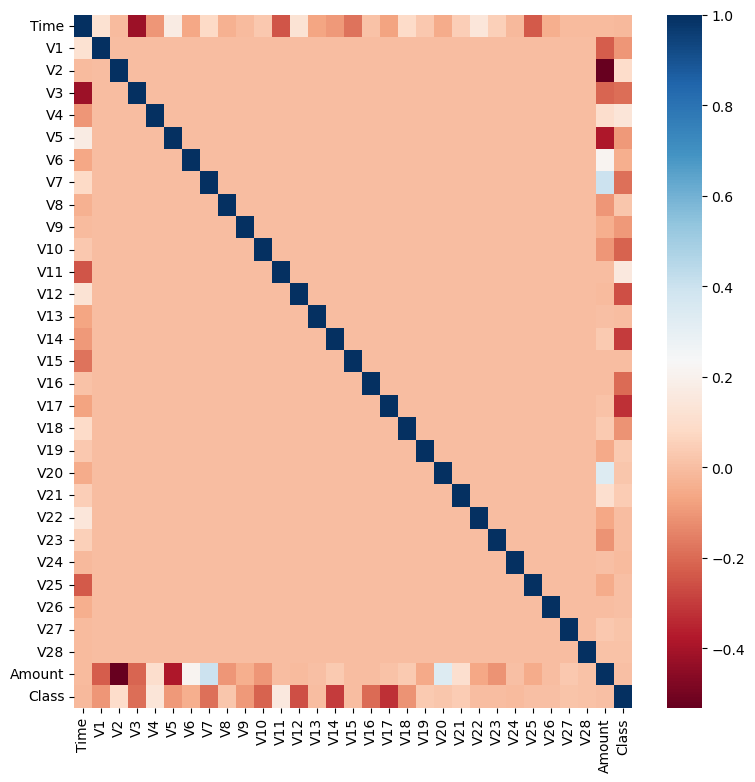

In [ ]:
# 3. 이상치 검출/제거
# 3.1 상관계수 확인
import matplotlib.pyplot as plt #기본적인 시각화
import seaborn as sns #고급 시각화 (특히 heatmap, 상관관계 분석에 유용)

plt.figure(figsize=(9,9)) #그래프 크기를 지정(가로9, 세로9인치)
# 상관 행렬이 보통 정사각형이기 때문에 정방형 그래프 크기가 보기 좋음
corr=card_df.corr()
# card_df는 신용카드 거래 데이터프레임,
# .corr()는 각 피처 간의 상관계수(Correlation Coefficient) 를 계산
# 상관계수란? :두 변수 간의 선형 관계의 강도와 방향을 나타내는 값
# 범위는 -1 ~ 1  (1: 완전 양의 상관)
# 0: 상관 없음 , -1: 완전 음의 상관
# 💡 예: V2와 V3 간의 상관계수가 0.8이면, 이 둘은 거의 같이 움직인다는 뜻

sns.heatmap(corr, cmap='RdBu') #heatmap: 상관계수 행렬을 색상으로 시각화
# cmap='RdBu': 빨강-파랑 색상 팔레트 사용
# 양의 상관: 파란색 계열
# 음의 상관: 빨간색 계열
# 0 근처: 흰색 (상관 없음)
plt.show()



---

###  목적 및 설명

| 목적 | 설명 |
|------|------|
|  **상관관계 파악** | 변수들 사이에 강한 상관성이 있는지 확인 가능 |
|  **중복/쓸모없는 변수 제거 판단** | 매우 높은 상관성 변수는 중복 정보일 수 있음 |
|  **이상치 힌트 탐색** | 특이한 상관 패턴이 있으면 데이터 오류나 이상치일 수 있음 |
|  **특성 선택 (Feature Selection)에 도움** | 어떤 변수를 모델에 넣을지 선택할 때 참고할 수 있음 |

---

### ✅ 실제 신용카드 사기 검출 데이터에서 중요한 이유

- 이 데이터는 대부분이 `V1 ~ V28`의 **PCA(주성분 분석)** 으로 축소된 값들로 구성되어 있음  
- 이 값들끼리 **강한 상관 관계**를 가질 수 있음  
- 상관성이 높은 피처들끼리 중복 입력되면, **모델의 과적합(overfitting)** 을 유발할 수 있음

---

### 📌 결론

> 이 코드는 **"데이터가 모델에 들어가기 전에, 변수들 사이의 관계를 시각적으로 이해하고, 이상치나 중복된 정보가 있는지 점검하기 위한 필수적인 탐색적 데이터 분석(EDA) 단계"**

---



In [ ]:
# 이상치 데이터에 대한 인덱스를 반환하는 함수
import numpy as np
import pandas as pd
# df=card_df 대입 예정
# column='V14'
def get_outlier(df=None, column=None, weight=1.5): #weight: IQR에 곱할 가중치 (기본값 1.5는 일반적인 Tukey's method
    # # column: 이상치를 탐지할 대상 컬럼 (예: 'V14')
    # fraud(class==1)에 해당하는 컬럼만 추출, 사분위(Q1,Q3) 지점을 구함
    fraud=df[df['Class']==1][column] # 492개 시리즈 나온다
    # -> 사기 거래(Class==1) 중에서 특정 컬럼의 값만 추출한 Series 객체
    # df: 데이터 프레임
    
    # 사분위수 계산 → IQR(Interquartile Range)을 구하기 위해 필요
    q_25=np.percentile(fraud.values,25) # Q1 위치에 있는 값, 1사분위
    q_75=np.percentile(fraud.values,75) # Q3 위치에 있는 값, 3사분위
    # IQR 구하고, 1.5 곱하기
    iqr = q_75 - q_25
    
    # IQR을 기준으로 아래/위 이상치 기준점 설정
    # Tukey 방식: [Q1 - 1.5×IQR, Q3 + 1.5×IQR] 범위를 벗어나면 이상치로 간주
    iqr_weight=iqr*weight
    low_value=q_25-iqr_weight # min
    high_value=q_75+iqr_weight # max
    # 최대값 크고, 최소값 작은 인덱스 반환
    
    # 설정된 기준보다 작거나 큰 값을 가진 행의 인덱스만 추출해서 반환
    outlier_index=fraud[(fraud<low_value) | (fraud>high_value)].index
    return outlier_index



---

## ✅ 이 함수가 왜 중요할까?

| 목적 | 설명 |
|------|------|
|  **사기 거래 내 이상치 탐지** | 극단적으로 높은/낮은 거래는 **데이터 오류**일 가능성도 있음 |
| ⚠ **모델 학습 방해 요소 제거** | 이상치는 학습 시 모델을 **왜곡**시키거나 **과적합**을 유발할 수 있음 |
|  **데이터 품질 향상** | 전처리 단계에서 이상치를 제거하면, **데이터의 신뢰성과 품질이 향상**됨 |

---





---

## ❓ 왜 사기 거래(Fraud)만 대상으로 이상치를 확인할까?

| 이유 | 설명 |
|------|------|
|  데이터 불균형 | 대부분의 **정상 거래는 수천 건**, **사기 거래는 500건 미만**으로 **극심한 불균형**이 존재. |
|  패턴 은폐 가능성 | 전체 데이터를 대상으로 이상치를 찾으면, **사기 거래의 특이한 패턴이 정상 거래에 묻혀버릴 수 있음** |
|  정밀 분석 필요 | 사기 거래는 수가 적고 중요한 만큼, **별도로 추출해 정밀하게 분석**할 필요가 있음 |
|  목적 | 사기 거래 내에서도 **극단적인 값(이상치)**을 걸러내어 **모델의 왜곡 방지**, **데이터 품질 향상**을 기대할 수 있다. |

---



In [ ]:
outlier_index=get_outlier(df=card_df, column='V14')
# get_outlier() 함수 호출
# → 신용카드 사기 거래(Class == 1) 중에서 V14 피처 값이 통계적으로 이상치인 데이터를 찾아냄
print(f'이상치 데이터의 인덱스 : {outlier_index}')

이상치 데이터의 인덱스 : Index([8296, 8615, 9035, 9252], dtype='int64')


In [ ]:
# 사기 거래(Class == 1) 중 V14 피처의 **이상치 기준(IQR 기반)**을 계산해서,
# 나중에 이상치 탐지 또는 제거를 하기 위한 준비 작업
fraud=card_df[card_df['Class']==1]['V14'] #기 거래(Class == 1) 만 필터링한 후, 그 중 V14 컬럼만 추출
# V14는 신용카드 사기 탐지 데이터에서 사기 거래 여부와 관련이 높은 변수
# 결과: fraud는 사기 거래에서 V14 변수 값들만 모은 Series
q1=np.percentile(fraud.values,25) #q1: 1사분위수 (25%)
q3=np.percentile(fraud.values,75) #q3: 3사분위수 (75%)

# QR (Interquartile Range): 3사분위수 - 1사분위수
# IQR은 데이터의 중간 50% 범위를 의미
# 이상치는 일반적으로 아래 기준을 벗어난 값을 말합니다:
# 이상치 기준:
# 값 < Q1 − 1.5 × IQR
# 값 > Q3 + 1.5 × IQR
iqr=q3-q1
print(f'q1 : {q1}, q3 : {q3}, IQR value : {iqr}')

q1 : -9.692722964972386, q3 : -4.282820849486865, IQR value : 5.409902115485521




---

##  V14 변수의 사기 거래 사분위수 해석

### 🔹 Q1 = `-9.69`

- 사기 거래(`Class == 1`) 중, `V14` 값의 **하위 25%**는 `-9.69`보다 작거나 같음  
- 👉 많은 사기 거래가 **음수 영역에 몰려 있음**을 시사

### 🔹 Q3 = `-4.28`

- `V14` 값의 **상위 25%**는 `-4.28`보다 크거나 같음

### 🔹 IQR = `5.41`

- 중간 50%의 데이터가 **약 5.41 단위 폭** 안에 존재  
- 👉 `V14` 값이 사기 거래 내에서 **꽤 넓게 분포**되어 있음

---

##  이상치 경계 계산 (IQR 기반)

이상치는 다음과 같은 기준으로 판단

- **하한값 (Lower Bound)** = `Q1 - 1.5 × IQR` = `-9.69 - (1.5 × 5.41)` ≈ **-17.81**
- **상한값 (Upper Bound)** = `Q3 + 1.5 × IQR` = `-4.28 + (1.5 × 5.41)` ≈ **3.84**

->  따라서 `V14` 값이 **-17.81보다 작거나, 3.84보다 크면 → 이상치**로 간주

---

## ✅ 결론

- `V14` 변수는 사기 거래에서 **대부분 음수로 구성**되어 있음
- **중앙값 주변에 데이터가 집중**되어 있지만, **극단적인 값(이상치)**도 존재
- 이 범위 기반 이상치 제거는  
   **모델 성능 개선** 및 **과적합 완화**에 도움이 됨

---





---

## 📐 사분위수란?

데이터를 크기 순으로 나열했을 때:

- **Q1 (1사분위수)**: 하위 25% 지점의 값  
- **Q3 (3사분위수)**: 상위 75% 지점의 값  

이 두 값은 **이상치 경계(IQR)** 를 계산할 때 핵심 기준으로 사용

---

## ❓ 왜 `V14` 변수로 IQR을 구하는가?

- `V14`는 **신용카드 사기 탐지 데이터에서 사기 거래와 가장 밀접한 관련**이 있는 변수 중 하나다.
- 특히, `V14`는 **극단적인 값(outlier)** 들이 존재하는 경우가 많아,
- **이상치 탐지 기준 변수로 매우 적합**

---

## ✅ 이 코드가 중요한 이유

| 목적 | 설명 |
|------|------|
|  **이상치 탐지를 위한 기준 계산** | IQR을 통해 **정량적인 이상치 판단 기준**을 설정 |
|  **사기 거래 내 통계적 특성 분석** | 특정 피처의 분포를 분석하여 **모델 해석력 향상** |
| ⚠ **모델 성능 향상** | 이상치를 제거하거나 조정하면 **모델의 안정성과 정확도**가 향상됨 |

---

## 🧠 결론

이 코드는 **사기 거래 내에서 이상치를 탐지하기 위한 핵심 지표인 IQR을 계산**하는 과정.
이후 이상치 탐지 함수에서 **Q1, Q3, IQR 값을 활용**해  
해당 거래가 **비정상적으로 작은지 또는 큰지를 판별**하게 된다.

---



In [ ]:
# get_preprocessed_df() 에 이상치 제거 하는 기능 추가
# 로그변환, 이상치 제거 추가
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    # 원본 df를 변형 없이 보존하기 위해 복사본 생성
    
    # Amount feature만 로그변환
    # Amount 컬럼은 거래 금액이며, 값의 범위가 매우 크다
# np.log1p()을 통해 로그 변환하면: => 큰 값의 영향력을 줄여줌
# 데이터 분포가 정규분포에 가까워져 모델 성능에 긍정적 영향
    amount_n=np.log1p(df_copy['Amount'])
    # 로그변환한 피처를 데이터프레임에 삽입(insert)
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Amount와 Time은 제거하고, 로그 변환한 Amount_Scaled만 사용
    df_copy.drop(['Time','Amount'],axis=1, inplace=True)
    
    # 이상치 데이터 제거
    outlier_index=get_outlier(df=df_copy, column='V14', weight=1.5)
    # get_outlier() 함수를 통해 V14 컬럼의 극단적인 이상치 행(row) 인덱스를 탐지
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy
# 이상치는 모델 학습 시:데이터 분포를 왜곡하거나 과적합(overfitting)을 유발할 수 있음
# 해당 행들을 제거함으로써: 데이터 품질 개선, 모델의 일반화 성능 향상



---

##  전처리 함수 핵심 요약 (`get_preprocessed_df()`)

| 처리 항목 | 설명 |
|------------|------|
| 💰 **Amount 로그 변환** | 큰 금액에 의한 영향 완화, **데이터 분포 정규화** |
|  **이상치 제거** | 극단값 제거로 **학습 안정화**, **과적합 방지** |
|  **전체 전처리 자동화** | 모델 입력을 위한 데이터를 **효율적으로 준비** |

---

###  결론

이 함수는 **정제된 데이터셋을 자동 생성**하여  
👉 이후 머신러닝 파이프라인(훈련/예측/평가)의  
**성능을 높이고, 신뢰성을 향상**시키는 데 **중요한 역할**. 

--- 

In [ ]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

# 1. object 생성 (로지스틱 회귀 모델 객체 생성)
# LogisticRegression: 이 모델은 선형 분류 모델로, 데이터의 특성들이 선형적으로 결합되어 결과를 예측하는 모델
# -> 신용카드 사기 검출 문제에서, '사기'와 '비사기'라는 두 클래스를 구별하는 데 사용
lr_clf=LogisticRegression(max_iter=1000) #로지스틱 회귀 모델이 최적의 파라미터를 찾을 때까지의 반복 횟수 설정
# 기본값은 100이지만, max_iter=1000으로 설정하여 더 많은 반복을 허용해 모델이 더 잘 수렴할 수 있도록 했다.

# LightGBM 모델 :Gradient Boosting Framework 중 하나로, 의사결정나무를 기반으로 한 앙상블 학습 방법
# 효율적인 메모리 사용과 속도 때문에 대규모 데이터셋에서 잘 작동
lgbm_clf=LGBMClassifier(
      n_estimators=1000 #LightGBM이 생성할 트리의 개수를 설정하는 파라미터입니다. 1000개의 트리를 학습시킨다는 의미
    , num_leaves=64 #하나의 트리가 가지는 최대 잎사귀의 개수를 설정, num_leaves 값이 클수록 모델이 더 복잡해지며, 과적합(overfitting) 위험높음
    , n_jobs=-1 #모델 학습 시 사용할 CPU 코어의 수를 지정합니다. -1은 모든 코어를 사용하라는 의미
    , boost_from_average=False #초기 학습 시 모델이 데이터를 평균값으로부터 시작하지 않도록 설정
) #기본값은 True이며, False로 설정하면 보다 자유로운 학습을 진행할 수 있음

# 2. 모델 학습, 예측 및 평가 함수
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train) #모델 학습
    pred = model.predict(ftr_test) # 예측값 생성
    pred_proba = model.predict_proba(ftr_test)[:, 1] #확률값생성
    get_clf_eval(tgt_test, pred, pred_proba) #성능평가
    

In [ ]:
# 데이터 분리
X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능') #로지스틱 회귀 예측 성능 출력
get_model_train_eval(
    lr_clf, ftr_train=X_train, 
    ftr_test=X_test, tgt_train=y_train,tgt_test=y_test
)
print('### lightgbm 예측 성능') #LightGBM 예측 성능 출력력
get_model_train_eval(
    lgbm_clf, ftr_train=X_train, 
    ftr_test=X_test, tgt_train=y_train,tgt_test=y_test
)

### 로지스틱 회귀 예측 성능
오차 행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8673, 재현율: 0.6712,    F1: 0.7568, AUC:0.9725
### lightgbm 예측 성능
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [ ]:
# 4. over sampling
from imblearn.over_sampling import SMOTE
# imblearn 라이브러리는 imbalance-learn 패키지로, 불균형 데이터 처리를 위한 도구
# SMOTE: minority class 데이터를 선형 보간하여 새로운 데이터 생성
smote=SMOTE(random_state=0)
X_train_over, y_train_over=smote.fit_resample(X_train, y_train)
# fit_resample() 메서드를 사용-> 훈련용 피처(X)와 타겟(y)에 대해 SMOTE를 적용

print('SMOTE 적용 전 학습용 피처/레이블 구조 : ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습 피처/레이블 구조 : ', 
      X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포',
      pd.Series(y_train).value_counts())
print('SMOTE 적용 후 레이블 값 분포 : '
      , pd.Series(y_train_over).value_counts())
# SMOTE 전에는 소수 클래스가 매우 적기 때문에 학습 데이터의 행 수가 적다.
# SMOTE 후에는 minority class가 synthetic data로 늘어나 전체 데이터의 수가 증가

SMOTE 적용 전 학습용 피처/레이블 구조 :  (199362, 29) (199362,)
SMOTE 적용 후 학습 피처/레이블 구조 :  (398040, 29) (398040,)
SMOTE 적용 전 레이블 값 분포 Class
0    199020
1       342
Name: count, dtype: int64
SMOTE 적용 후 레이블 값 분포 :  Class
0    199020
1    199020
Name: count, dtype: int64


In [32]:
# 로지스틱 회귀의 성능 평가
lr_clf=LogisticRegression(max_iter=1000)

get_model_train_eval(
    lr_clf,
    ftr_train=X_train_over,
    ftr_test=X_test,
    tgt_train=y_train_over,
    tgt_test=y_test
)

오차 행렬
[[82933  2362]
 [   11   135]]
정확도: 0.9722, 정밀도: 0.0541, 재현율: 0.9247,    F1: 0.1022, AUC:0.9736


In [ ]:
# LightGBM 모델의 성능 평가
get_model_train_eval(
    lgbm_clf,
    ftr_train=X_train_over,
    ftr_test=X_test,
    tgt_train=y_train_over,
    tgt_test=y_test
)

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\xgboost\training.py:183: UserWarning: [00:24:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 [XGBoost 성능 평가 결과]
AUC: 0.9856
정확도: 0.9995
정밀도: 0.8571
재현율: 0.8571
F1 점수: 0.8571
오차 행렬:
[[56850    14]
 [   14    84]]


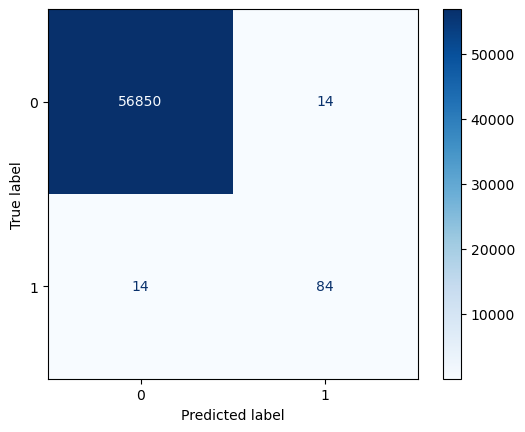

In [ ]:
# xgboost 모델에 필요한 라이브러리
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)
from xgboost import XGBClassifier

# 1️. 데이터 로드
data = pd.read_csv('./creditcard.csv')  # 파일 경로를 상황에 맞게 수정

# 2️. 데이터 준비
X = data.drop('Class', axis=1)
y = data['Class']

# 3️. 'Amount', 'Time' 특성 스케일링
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

# 4️. 훈련/테스트 분할 (80:20), stratify로 클래스 비율 유지
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5️. XGBoost 모델 정의 (불균형 대응: scale_pos_weight)
scale = (y_train == 0).sum() / (y_train == 1).sum()

model = XGBClassifier(
    scale_pos_weight=scale,
    learning_rate=0.1,
    max_depth=4,
    n_estimators=300,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# 6️. 모델 학습
model.fit(X_train, y_train)

# 7️. 예측
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

# 8️. 성능 평가
auc = roc_auc_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# 9️. 평가 출력
print(f'\n [XGBoost 성능 평가 결과]')
print(f'AUC: {auc:.4f}')
print(f'정확도: {acc:.4f}')
print(f'정밀도: {prec:.4f}')
print(f'재현율: {recall:.4f}')
print(f'F1 점수: {f1:.4f}')
print(f'오차 행렬:\n{cm}')

# 10. 오차 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


In [ ]:
# 튜닝 
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

# 데이터 전처리
X = data.drop('Class', axis=1)
y = data['Class']
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scale = (y_train == 0).sum() / (y_train == 1).sum()

# Optuna 목적 함수 정의
def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "scale_pos_weight": scale,
        "eval_metric": "auc",
        "use_label_encoder": False,
        "random_state": 42,
        "n_jobs": -1
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid, y_pred_proba)
    return auc

# Optuna 최적화 수행
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# 최적 파라미터 출력
print(' Best params:', study.best_params)


c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-04-14 00:26:45,319] A new study created in memory with name: no-name-657f3468-f8b4-491d-9482-ee92d9f2877e
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\xgboost\training.py:183: UserWarning: [00:26:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-04-14 00:26:50,067] Trial 0 finished with value: 0.9736026093048362 and parameters: {'learning_rate': 0.274971324105938, 'max_depth': 8, 'n_estimators': 215, 'subsample': 0.9785423070724676, 'colsample_bytree': 0.809465519171982}. Best is trial 0 with value: 0.9736026093048362.
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\xgboost\training.py:1

 Best params: {'learning_rate': 0.18638104077389606, 'max_depth': 10, 'n_estimators': 456, 'subsample': 0.6018154263216793, 'colsample_bytree': 0.9941267780364907}


c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\xgboost\training.py:183: UserWarning: [00:34:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


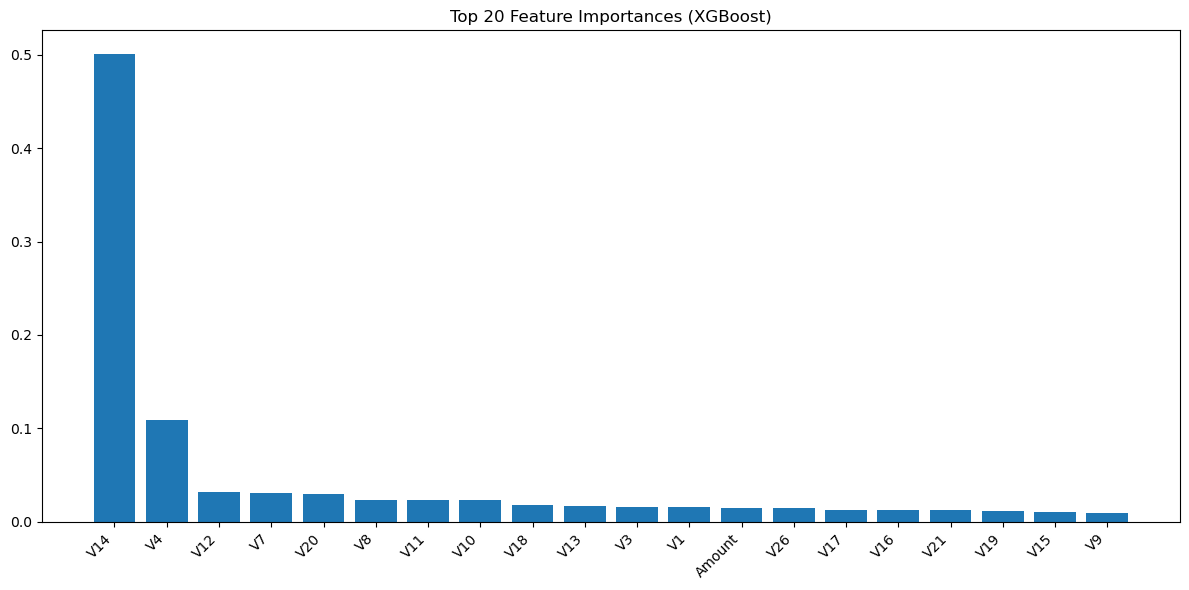

In [4]:
import matplotlib.pyplot as plt

# 최적 파라미터로 모델 재학습
best_model = XGBClassifier(
    **study.best_params,
    scale_pos_weight=scale,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)
best_model.fit(X_train, y_train)

# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
xgb_importances = best_model.feature_importances_
sorted_idx = np.argsort(xgb_importances)[::-1]
top_n = 20

plt.bar(range(top_n), xgb_importances[sorted_idx[:top_n]], align="center")
plt.xticks(range(top_n), X.columns[sorted_idx[:top_n]], rotation=45, ha='right')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()



 [Random Forest 성능 평가]
정확도:   0.9994
정밀도:   0.8182
재현율:   0.8265
F1 점수:  0.8223
AUC 점수: 0.9766
오차 행렬:
[[56846    18]
 [   17    81]]


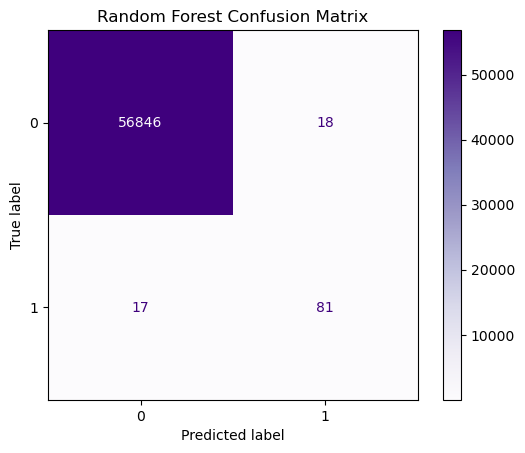

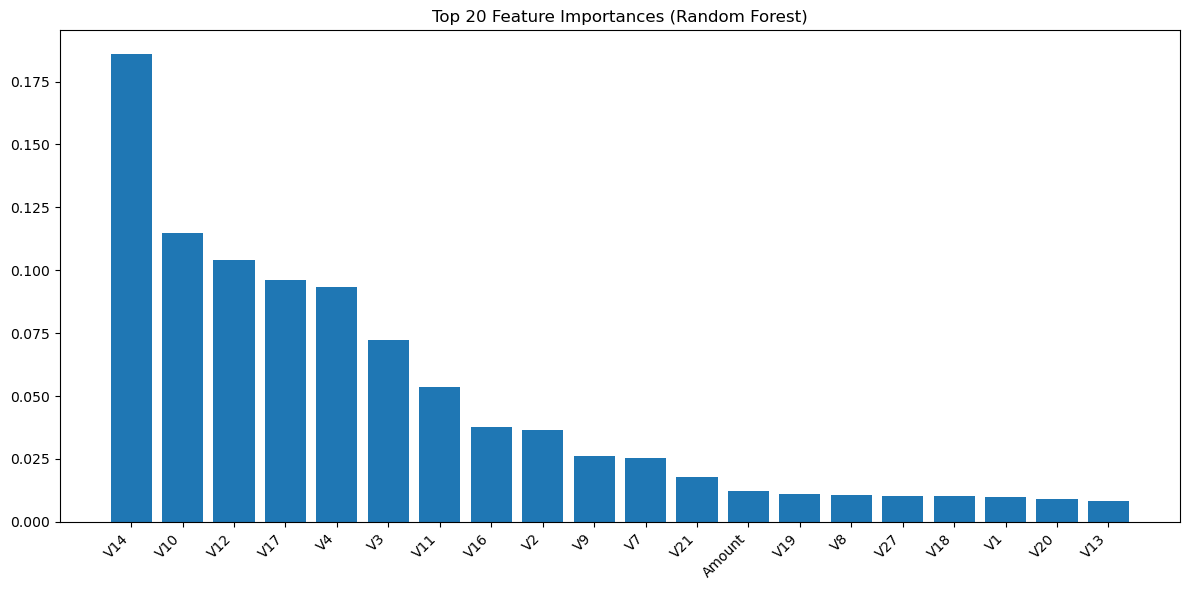

In [ ]:
#RandomForest모델에 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 1️. 데이터 불러오기
data = pd.read_csv('./creditcard.csv')  # 경로는 실제 위치에 맞게 조정

# 2️. 특성과 라벨 분리
X = data.drop('Class', axis=1)
y = data['Class']

# 3️. 'Amount', 'Time' 정규화
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

# 4️. 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5️. RandomForest 모델 정의 (불균형 대응 포함)
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced',  # 핵심: 클래스 불균형 보정
    n_jobs=-1
)

# 6️. 모델 학습
model.fit(X_train, y_train)

# 7️. 예측
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 8️. 성능 평가 지표 계산
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

# 9️. 결과 출력
print('\n [Random Forest 성능 평가]')
print(f'정확도:   {acc:.4f}')
print(f'정밀도:   {prec:.4f}')
print(f'재현율:   {recall:.4f}')
print(f'F1 점수:  {f1:.4f}')
print(f'AUC 점수: {auc:.4f}')
print(f'오차 행렬:\n{cm}')

# 10. 오차행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title('Random Forest Confusion Matrix')
plt.show()

# 11. 특성 중요도 시각화
importances = model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
top_n = 20

plt.figure(figsize=(12, 6))
plt.bar(range(top_n), importances[sorted_idx[:top_n]])
plt.xticks(range(top_n), X.columns[sorted_idx[:top_n]], rotation=45, ha='right')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()
